In [8]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [24]:
# define state types
class BMIState(TypedDict):
    height: float
    weight: float
    bmi: float
    category: str

In [25]:
def calculate_bmi(state: BMIState) -> BMIState: # type hinting
    """Calculate BMI based on height and weight."""
    height_m = state['height'] / 100  # convert cm to m
    bmi = state['weight'] / (height_m ** 2)
    state['bmi'] = bmi
    return state 

In [26]:
def label_bmi(state: BMIState) -> BMIState:
    """Label the BMI category based on the calculated BMI."""
    if state['bmi'] < 18.5:
        state['category'] = 'Underweight'
    elif 18.5 <= state['bmi'] < 24.9:
        state['category'] = 'Normal weight'
    elif 25 <= state['bmi'] < 29.9:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obesity'
    return state

In [27]:
# define your graph
graph = StateGraph(BMIState)

# add nodes to the graph

graph.add_node("caculate_bmi", calculate_bmi)
graph.add_node("label_bmi",label_bmi)

# add edge to the graph

graph.add_edge(START, "caculate_bmi")
graph.add_edge("caculate_bmi", "label_bmi")
graph.add_edge("label_bmi", END)


# compile the graph
workflow = graph.compile()

In [29]:
# execute the graph

initial_state = {'height':173,'weight':75}

final_state = workflow.invoke(initial_state)

print(final_state) 

{'height': 173, 'weight': 75, 'bmi': 25.05930702662969, 'category': 'Overweight'}


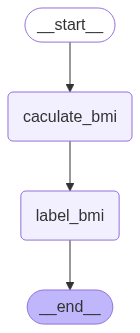

In [30]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())